<a href="https://colab.research.google.com/github/lomovtsevp/ML_course_MIREA/blob/main/5/ML_LAB5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from PIL import Image
from matplotlib import pyplot as plt
from itertools import product
import random
import numpy as np

# В данной части лабораторной работы предлагается реализовать метод главных компонент для сокращения
# размерности даннных. В качестве данных предлагаются изображения с лицами людей.

# Для выполнения этой работы необходимо заполнить код в следующих фукнциях:
# 1. pca - реализует алгоритм метода главных компонент.
# 2. project_data - проецирует данные в пространство с базисом, заданным матрицей перехода.
# 3. recover_data - восстанавливает спроецированные данные.

In [11]:
def load_data(data_file_path):

    # Функция для загрузки данных.
    # Принимает на вход путь к файлу.
    # Возвращает матрицу данных.

    with open(data_file_path) as input_file:
        X = list()
        for line in input_file:
            row = list(map(float, line.split(',')))
            X.append(row)
        return np.array(X, float)

In [12]:
def pca(X, k):

    # Функция, реализующая алгоритм метода главных компонент. Принимает на вход матрицу данных X и
    # число главных компонент k.
    # Должна возвращать k главных компонент в виде матрицы (главные компоненты - столбцы) и долю сохраненной дисперсии.

    m, n = X.shape  # m - количество примеров в матрице X, n - количество признаков.


    for i in range(n):
      X[:, i] = X[:, i] - np.mean(X[:, i])

    covariance_matrix = np.cov(X.T, bias=False)

    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

    idx = eigen_values.argsort()[::-1]
    eigen_values_sorted = eigen_values[idx]
    eigen_vectors_sorted = eigen_vectors[:, idx]

    k_eigen_values = eigen_values_sorted[:k]
    k_eigen_vectors = eigen_vectors_sorted[:,:k]

    U = k_eigen_vectors  # матрица главных компонент, нужно заполнить.
    saved_disp = np.sum(k_eigen_values) / np.sum(eigen_values) # доля сохранненой дисперсии после преобразования, необходимо рассчитать.

    return U, saved_disp

In [13]:
def project_data(X, U):

    # Функция для проекции данных в пространство с базисом, заданным матрицей U.
    # Принимает матрицу данных X и матрицу U, задающую базис пространства.
    # Должна возвращать новую матрицу данных, где все точки спроецированны в заданное пространство.

    Xp = X @ U  # результат, надо заполнить

    return Xp

In [14]:
def recover_data(Xp, U):

    # Функция для проекции данных из пространства с базисом, заданным матрицей U, в базис ijk.
    # Принимает матрицу данных Xp и матрицу U, задающую базис пространства.
    # Должна возвращать новую матрицу данных, где все точки спроецированны из заданного пространства,
    # в пространство с базисом ijk.

    X_rec = Xp @ U.T# результат, надо заполнить


    return X_rec

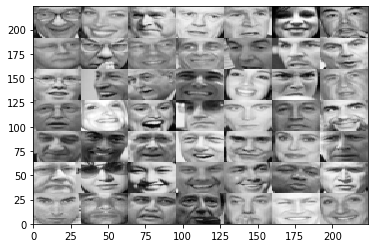

In [15]:
X = load_data('faces.txt')

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = -X[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()

In [16]:
K = 64  # количество главных компонент, можно поварьировать

U, disp = pca(X, K)

print('Доля сохраненной дисперсии (должна быть ~0.911 при K = 64):', disp)

Xp = project_data(X, U)
X_rec = recover_data(Xp, U)

Доля сохраненной дисперсии (должна быть ~0.911 при K = 64): 0.8946808356208


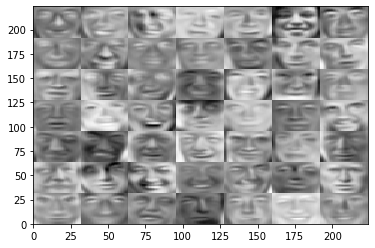

In [17]:
hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = -X_rec[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()

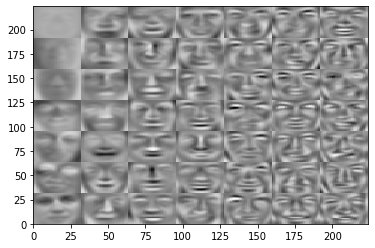

In [18]:
hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = U.transpose()[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()